In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("covid_data.csv")

In [3]:
print(df.head())
print(df.shape)
print(df.columns)

         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  
(35156, 10)
Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
countries = ["India", "US", "Brazil"]

df_countries = df[df["Country/Region"].isin(countries)]

In [7]:
# Weekly Cases Calculation
weekly_cases = (
    df_countries
    .groupby(["Country/Region", pd.Grouper(key="Date", freq="W")])["New cases"]
    .sum()
    .reset_index()
)


In [8]:
df_countries["7_day_avg"] = (
    df_countries
    .groupby("Country/Region")["New cases"]
    .rolling(window=7)
    .mean()
    .reset_index(0, drop=True)
)


C:\Users\Aftab\AppData\Local\Temp\ipykernel_3928\3967022622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries["7_day_avg"] = (


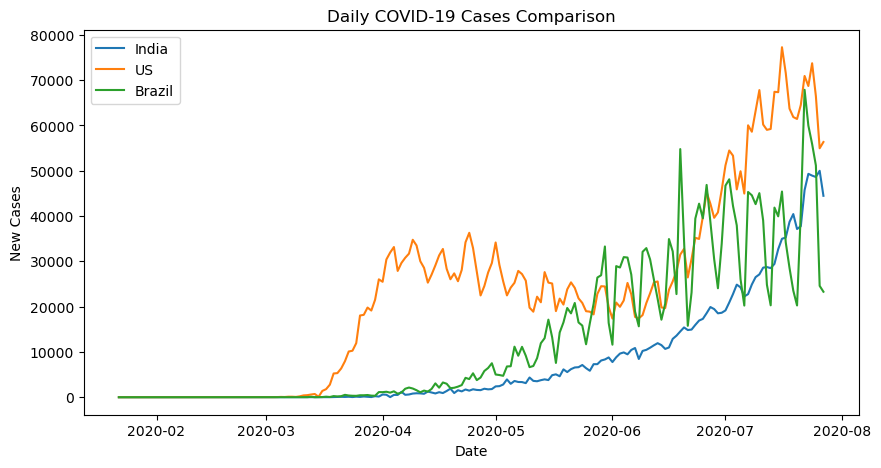

In [9]:
plt.figure(figsize=(10,5))

for country in countries:
    data = df_countries[df_countries["Country/Region"] == country]
    plt.plot(data["Date"], data["New cases"], label=country)

plt.title("Daily COVID-19 Cases Comparison")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()


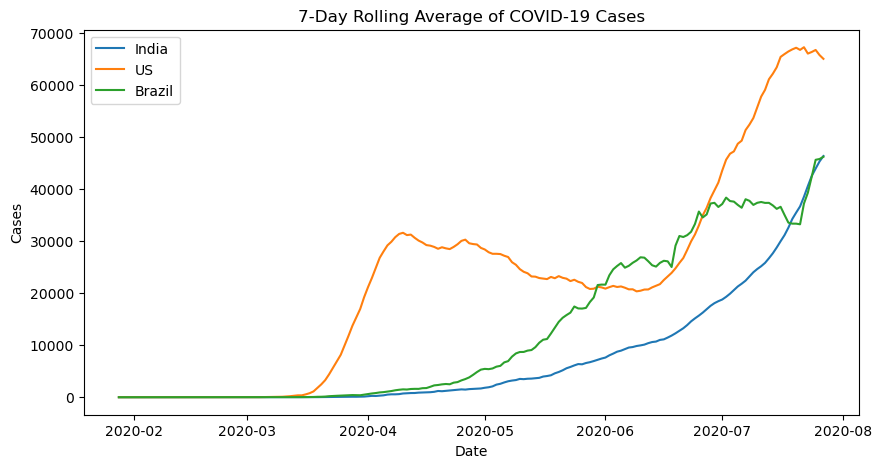

In [10]:
# Rolling Average Plot
plt.figure(figsize=(10,5))

for country in countries:
    data = df_countries[df_countries["Country/Region"] == country]
    plt.plot(data["Date"], data["7_day_avg"], label=country)

plt.title("7-Day Rolling Average of COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()



In [11]:
# Peak Detection
for country in countries:
    data = df_countries[df_countries["Country/Region"] == country]
    peak_row = data.loc[data["New cases"].idxmax()]
    
    print(f"{country} peak:")
    print("Date:", peak_row["Date"].date())
    print("Cases:", peak_row["New cases"])
    print("-" * 30)


India peak:
Date: 2020-07-26
Cases: 49981
------------------------------
US peak:
Date: 2020-07-16
Cases: 77255
------------------------------
Brazil peak:
Date: 2020-07-22
Cases: 67860
------------------------------


In [12]:
# Trend-based insight
trend = df_countries.groupby("Country/Region")["New cases"].mean()
print(trend)


Country/Region
Brazil    12991.356383
India      7872.728723
US        22820.521277
Name: New cases, dtype: float64


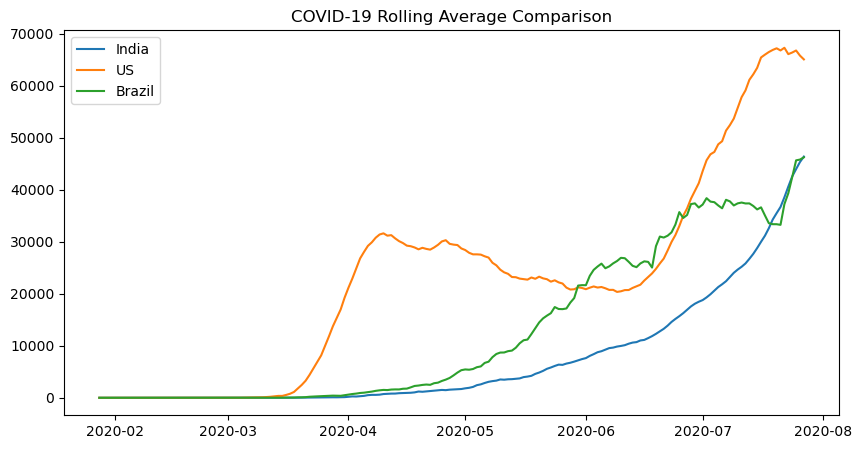

In [13]:
# Exporting Graphs
plt.figure(figsize=(10,5))

for country in countries:
    data = df_countries[df_countries["Country/Region"] == country]
    plt.plot(data["Date"], data["7_day_avg"], label=country)

plt.legend()
plt.title("COVID-19 Rolling Average Comparison")
plt.savefig("covid_trend_comparison.png")
plt.show()
